Octubre 2024

# Especialización en Inteligencia Artificial, Universidad Minuto de Dios
## Fundamentos para IA NRC-405
Jose Guillermo Valle Pavas

Actividad Semana 6 - **Estadística inferencial**
___

### **Importacion y analisis de los datos:**

In [190]:
# importamos las librerias que vamos ausar
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
# cargar Data
path = 'https://www4.stat.ncsu.edu/%7Eboos/var.select/diabetes.tab.txt'
# se importa como csv, pero se especifica que esta separado por tabs
data = pd.read_csv(path, sep='\t')
print(data)

     AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...  ...
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57

[442 rows x 11 columns]


In [188]:
# mostramos el head del data set
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


### **Limpieza de datos:**

In [122]:
# modificamos todos los valores para qie sean numericos, pasamos los float64 a int64
data = data.astype({'BMI': 'int64', 'BP': 'int64', 'S2': 'int64','S2': 'int64', 'S3': 'int64', 'S4': 'int64', 'S5': 'int64' })
data.dtypes

,0
AGE,int64
SEX,int64
BMI,int64
BP,int64
S1,int64
S2,int64
S3,int64
S4,int64
S5,int64
S6,int64


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AGE     442 non-null    int64
 1   SEX     442 non-null    int64
 2   BMI     442 non-null    int64
 3   BP      442 non-null    int64
 4   S1      442 non-null    int64
 5   S2      442 non-null    int64
 6   S3      442 non-null    int64
 7   S4      442 non-null    int64
 8   S5      442 non-null    int64
 9   S6      442 non-null    int64
 10  Y       442 non-null    int64
dtypes: int64(11)
memory usage: 38.1 KB


In [124]:
# validamos si tenemos valotres nulos
data.isnull().sum()

,0
AGE,0
SEX,0
BMI,0
BP,0
S1,0
S2,0
S3,0
S4,0
S5,0
S6,0


In [125]:
# validamos si tenemos valores duplicados y los tratamos
nRow1, nCol1 = data.shape
duplicados = data.duplicated().sum()
porcentaje = round ((duplicados * 100)/nRow1, 2)
print(f'El numero de duplicados es: {duplicados} que equivale a un {porcentaje}')
if porcentaje != 0:
    if porcentaje < 1:
        print(f'Se eliminaran los registros duplicados')
        print(f'Tamaño ANTES de eliminar la duplicadas: {data.shape}')
        data.drop_duplicates(inplace=True)
        print(f'Tamaño DESPUES de eliminar la duplicadas: {data.shape}')
    else :
        print(f'No se eliminaron registros, por que el porcenaje es igual o mayor a 1')
else :
    print(f'No se eliminaron registros, por que no hay duplicados')

El numero de duplicados es: 0 que equivale a un 0.0
No se eliminaron registros, por que no hay duplicados


In [126]:
# identificamos las variables finales que tenemos, numéricas y categóricas
variables_numericas = [col for col in data.columns if data[col].dtype != object]
variables_categoricas = [col for col in data.columns if data[col].dtype == object]
print(f'Variables numericas: {variables_numericas}')
print(f'Variables Categoricas: {variables_categoricas}')

Variables numericas: ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']
Variables Categoricas: []


### **Boxplot:**

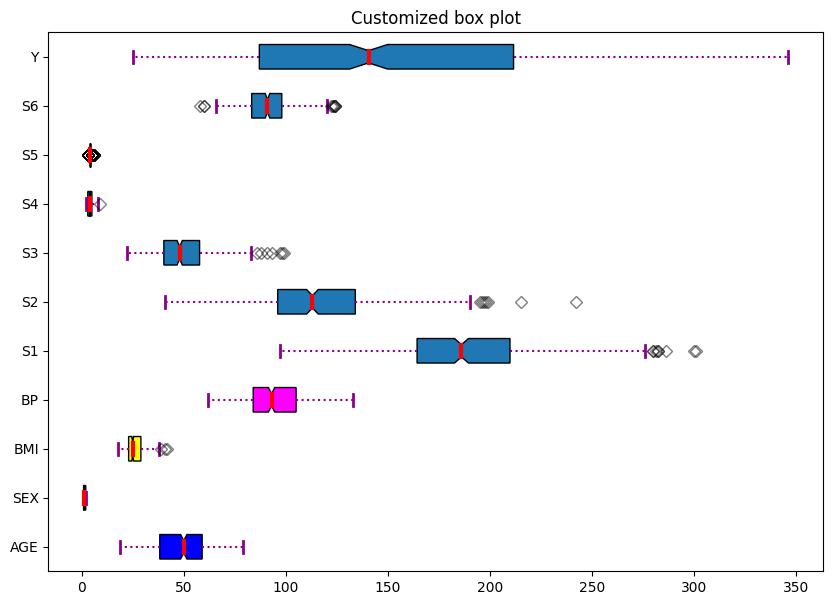

In [130]:
# creamos un boxplot para visualizar los valores atipicos en cada una de las variables
# identificamos los valores atipicos
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# cambiar el color y el ancho de línea de
# bigotes
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# cambiar el color y el ancho de línea de
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# cambiar el color y el ancho de línea de
# medianas
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

#cambiar el estilo de los volantes
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

# etiquetas x-axis
ax.set_yticklabels(data)

# adicionar titulo
plt.title("Customized box plot")

# Eliminación de los ejes superiores y derechos
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# mostrar el grafico plot
plt.show()

### **Eliminamos los datos  con valores atipicos:**
Identificacmos que las columnas S6, S5, S3, S2, S1 y BMI tienen valores atipicoss ya sea minimos o maximos, estos datos deben ser tratados, analizados y eliminados si es necesario.

### **Variable S6:**

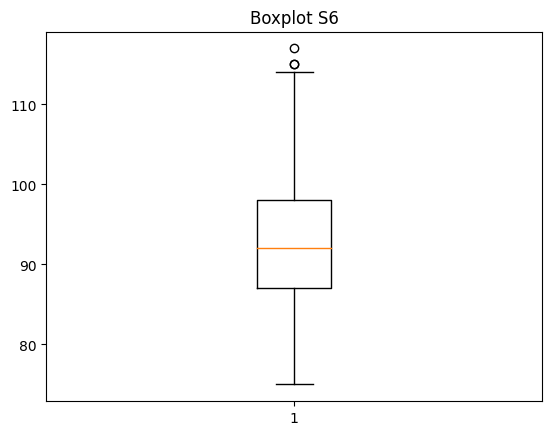

In [165]:
#generamos una grafica box plot y observamos los valores atipicos para la variable S6
plt.boxplot(data['S6'])
plt.title('Boxplot S6')
plt.show()

In [132]:
print(f'Valores ANTES de ser eliminados: {data.shape}')
#Identificamos los quartiles, el rango inter quartil  y los lmites superior e inferior
q1 = data['S6'].quantile(.25)
q3 = data['S6'].quantile(.75)
iqr = q3 - q1
toprangeS6 = q3 + iqr * 1.4
botrangeS6 = q3 - iqr * 1.6
#Eliminamos los valores que esten por encima del limite superior y por debajo del limite inferior
copydata = data.copy()
copydata = copydata.drop(copydata[copydata['S6'] > toprangeS6].index)
copydata = copydata.drop(copydata[copydata['S6'] < botrangeS6].index)
print(f'Valores DEPSUES de ser eliminados: {copydata.shape}')

Valores ANTES de ser eliminados: (442, 11)
Valores DEPSUES de ser eliminados: (405, 11)


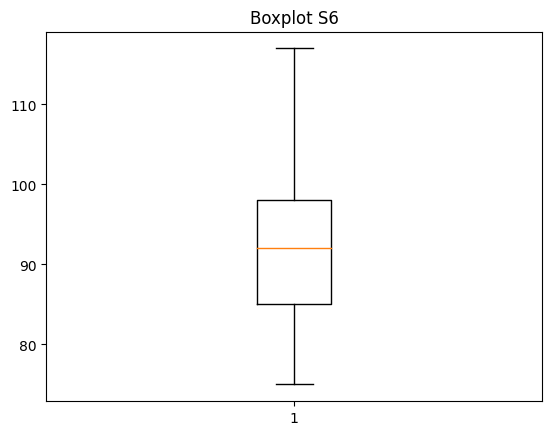

In [133]:
#generamos una grafica box plot y validamos el borrado de los valores atipicos para la variable S6
plt.boxplot(copydata['S6'])
plt.title('Boxplot S6')
plt.show()

### **Variable S5:**

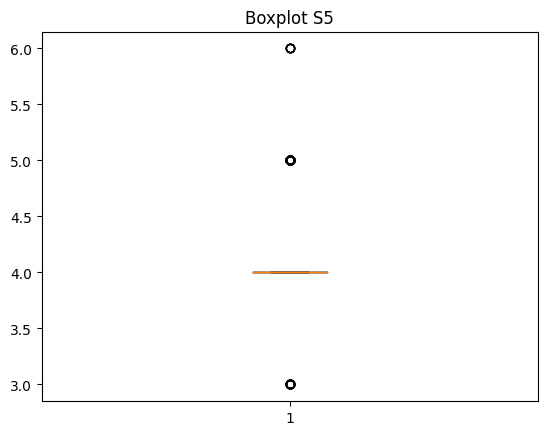

In [134]:
data=copydata
#generamos una grafica box plot y observamos los valores atipicos para la variable S6
plt.boxplot(data['S5'])
plt.title('Boxplot S5')
plt.show()

In [135]:
print(f'Valores ANTES de ser eliminados: {data.shape}')
#Identificamos los quartiles, el rango inter quartil  y los lmites superior e inferior
q1 = data['S5'].quantile(.25)
q3 = data['S5'].quantile(.75)
iqr = q3 - q1
toprangeS6 = q3 + iqr * 1.5
botrangeS6 = q3 - iqr * 1.5
#Eliminamos los valores que esten por encima del limite superior y por debajo del limite inferior
copydata = data.copy()
copydata = copydata.drop(copydata[copydata['S5'] > toprangeS6].index)
copydata = copydata.drop(copydata[copydata['S5'] < botrangeS6].index)
print(f'Valores DEPSUES de ser eliminados: {copydata.shape}')

Valores ANTES de ser eliminados: (405, 11)
Valores DEPSUES de ser eliminados: (266, 11)


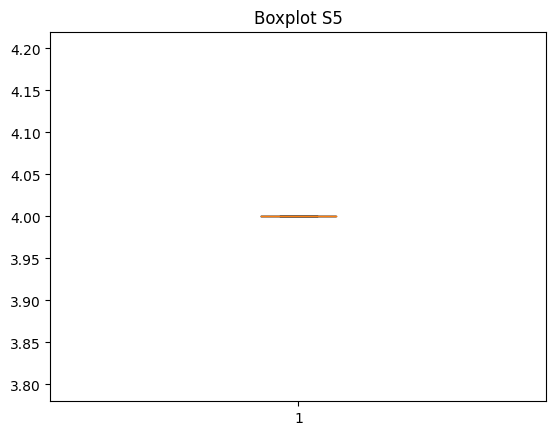

In [136]:
#generamos una grafica box plot y validamos el borrado de los valores atipicos para la variable S5
plt.boxplot(copydata['S5'])
plt.title('Boxplot S5')
plt.show()

### **Variable S3:**

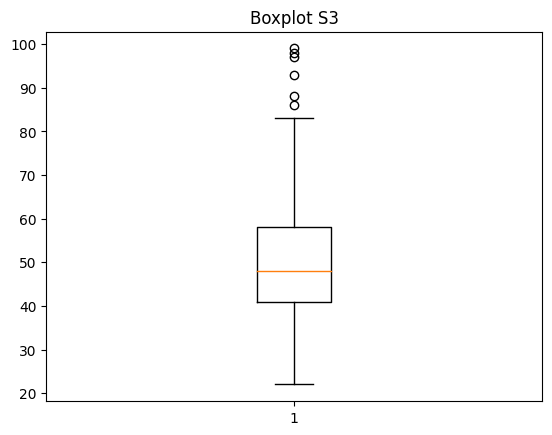

In [137]:
data=copydata
#generamos una grafica box plot y observamos los valores atipicos para la variable S3
plt.boxplot(data['S3'])
plt.title('Boxplot S3')
plt.show()

In [138]:
print(f'Valores ANTES de ser eliminados: {data.shape}')
#Identificamos los quartiles, el rango inter quartil  y los lmites superior e inferior
q1 = data['S3'].quantile(.25)
q3 = data['S3'].quantile(.75)
iqr = q3 - q1
toprangeS6 = q3 + iqr * 1.4
botrangeS6 = q3 - iqr * 1.6
#Eliminamos los valores que esten por encima del limite superior y por debajo del limite inferior
copydata = data.copy()
copydata = copydata.drop(copydata[copydata['S3'] > toprangeS6].index)
copydata = copydata.drop(copydata[copydata['S3'] < botrangeS6].index)
print(f'Valores DEPSUES de ser eliminados: {copydata.shape}')

Valores ANTES de ser eliminados: (266, 11)
Valores DEPSUES de ser eliminados: (250, 11)


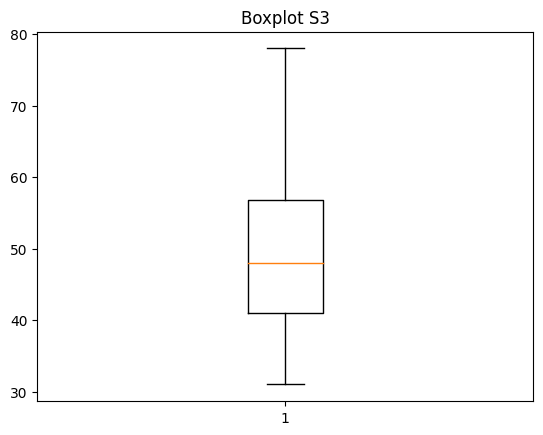

In [139]:
#generamos una grafica box plot y validamos el borrado de los valores atipicos para la variable S3
plt.boxplot(copydata['S3'])
plt.title('Boxplot S3')
plt.show()

### **Variable S2:**

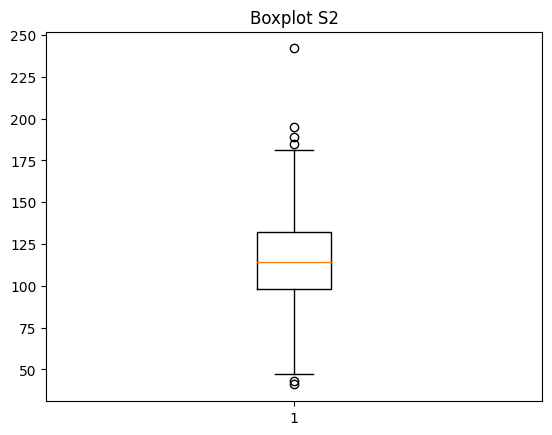

In [140]:
data=copydata
#generamos una grafica box plot y observamos los valores atipicos para la variable S2
plt.boxplot(data['S2'])
plt.title('Boxplot S2')
plt.show()

In [141]:
print(f'Valores ANTES de ser eliminados: {data.shape}')
#Identificamos los quartiles, el rango inter quartil  y los lmites superior e inferior
q1 = data['S2'].quantile(.25)
q3 = data['S2'].quantile(.75)
iqr = q3 - q1
toprangeS6 = q3 + iqr * 1.4
botrangeS6 = q3 - iqr * 1.6
#Eliminamos los valores que esten por encima del limite superior y por debajo del limite inferior
copydata = data.copy()
copydata = copydata.drop(copydata[copydata['S2'] > toprangeS6].index)
copydata = copydata.drop(copydata[copydata['S2'] < botrangeS6].index)
print(f'Valores DEPSUES de ser eliminados: {copydata.shape}')

Valores ANTES de ser eliminados: (250, 11)
Valores DEPSUES de ser eliminados: (223, 11)


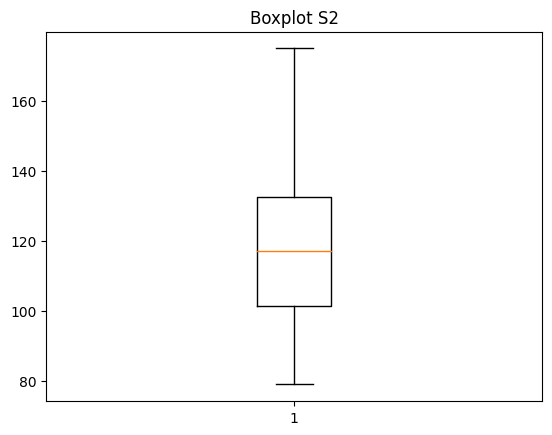

In [142]:
#generamos una grafica box plot y validamos el borrado de los valores atipicos para la variable S2
plt.boxplot(copydata['S2'])
plt.title('Boxplot S2')
plt.show()

### **Variable S1:**

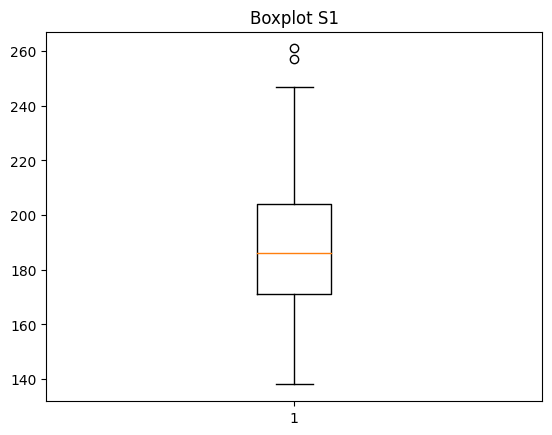

In [143]:
data=copydata
#generamos una grafica box plot y observamos los valores atipicos para la variable S1
plt.boxplot(data['S1'])
plt.title('Boxplot S1')
plt.show()

In [144]:
print(f'Valores ANTES de ser eliminados: {data.shape}')
#Identificamos los quartiles, el rango inter quartil  y los lmites superior e inferior
q1 = data['S1'].quantile(.25)
q3 = data['S1'].quantile(.75)
iqr = q3 - q1
toprangeS6 = q3 + iqr * 1.4
botrangeS6 = q3 - iqr * 1.6
#Eliminamos los valores que esten por encima del limite superior y por debajo del limite inferior
copydata = data.copy()
copydata = copydata.drop(copydata[copydata['S1'] > toprangeS6].index)
copydata = copydata.drop(copydata[copydata['S1'] < botrangeS6].index)
print(f'Valores DEPSUES de ser eliminados: {copydata.shape}')

Valores ANTES de ser eliminados: (223, 11)
Valores DEPSUES de ser eliminados: (214, 11)


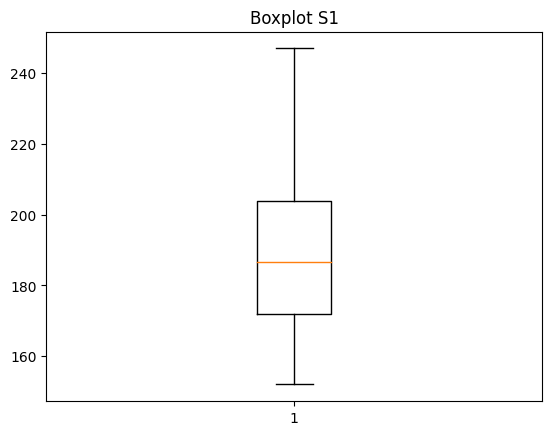

In [145]:
#generamos una grafica box plot y validamos el borrado de los valores atipicos para la variable S1
plt.boxplot(copydata['S1'])
plt.title('Boxplot S1')
plt.show()

### **Variable BMI:**

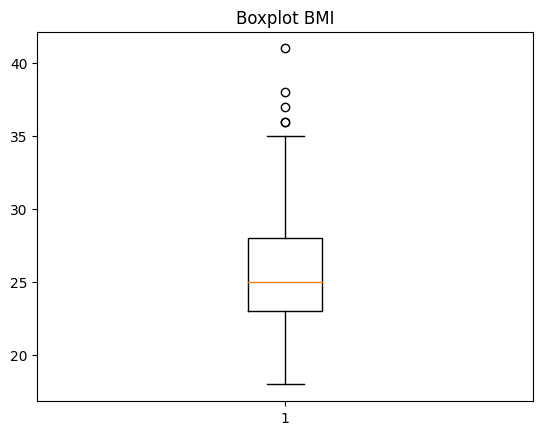

In [146]:
data=copydata
#generamos una grafica box plot y observamos los valores atipicos para la variable BMI
plt.boxplot(data['BMI'])
plt.title('Boxplot BMI')
plt.show()

In [161]:
print(f'Valores ANTES de ser eliminados: {data.shape}')
#Identificamos los quartiles, el rango inter quartil  y los lmites superior e inferior
q1 = data['BMI'].quantile(.25)
q3 = data['BMI'].quantile(.75)
iqr = q3 - q1
toprangeS6 = q3 + iqr * 1.3
botrangeS6 = q3 - iqr * 1.5
#Eliminamos los valores que esten por encima del limite superior y por debajo del limite inferior
copydata = data.copy()
copydata = copydata.drop(copydata[copydata['BMI'] > toprangeS6].index)
copydata = copydata.drop(copydata[copydata['BMI'] < botrangeS6].index)
print(f'Valores DEPSUES de ser eliminados: {copydata.shape}')

Valores ANTES de ser eliminados: (214, 11)
Valores DEPSUES de ser eliminados: (189, 11)


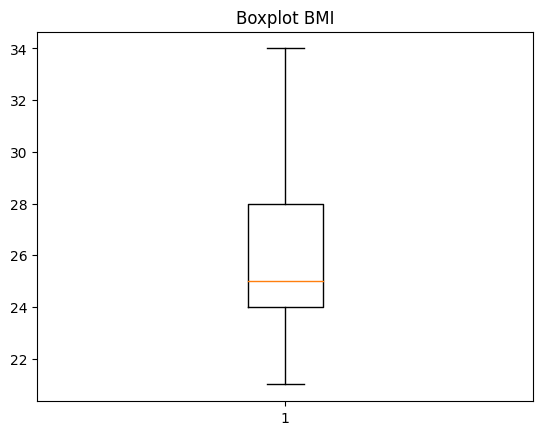

In [162]:
#generamos una grafica box plot y validamos el borrado de los valores atipicos para la variable S5
plt.boxplot(copydata['BMI'])
plt.title('Boxplot BMI')
plt.show()

### **Boxplot:**
Generamos de nuevo la visualizacion para validar el resultado de la eliminacion de valores a tipicos y vemos que aun se presnetan datos atipicos en el la variables S6, por ello corremos de nuevo el borrado en dicha variable

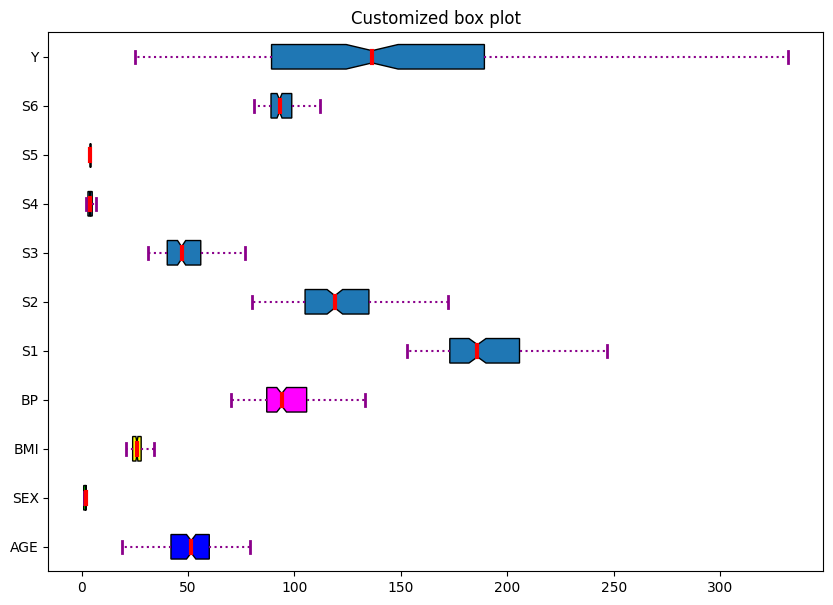

In [172]:
data=copydata
# creamos un boxplot para visualizar los valores atipicos en cada una de las variables
# identificamos los valores atipicos
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# cambiar el color y el ancho de línea de
# bigotes
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# cambiar el color y el ancho de línea de
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# cambiar el color y el ancho de línea de
# medianas
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

#cambiar el estilo de los volantes
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

# etiquetas x-axis
ax.set_yticklabels(data)

# adicionar titulo
plt.title("Customized box plot")

# Eliminación de los ejes superiores y derechos
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# mostrar el grafico plot
plt.show()

### **Variable S6:**

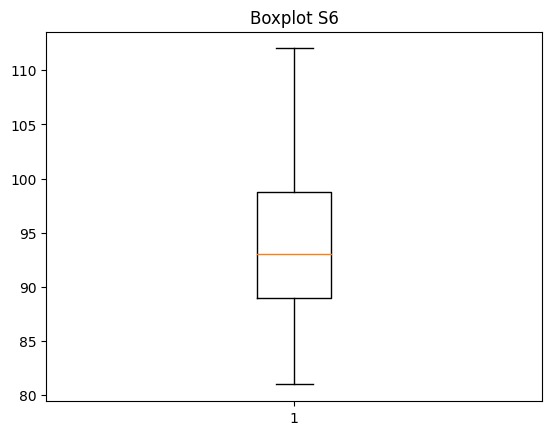

In [171]:
#generamos una grafica box plot y observamos los valores atipicos para la variable S6
plt.boxplot(data['S6'])
plt.title('Boxplot S6')
plt.show()

In [167]:
print(f'Valores ANTES de ser eliminados: {data.shape}')
#Identificamos los quartiles, el rango inter quartil  y los lmites superior e inferior
q1 = data['S6'].quantile(.25)
q3 = data['S6'].quantile(.75)
iqr = q3 - q1
toprangeS6 = q3 + iqr * 1.4
botrangeS6 = q3 - iqr * 1.6
#Eliminamos los valores que esten por encima del limite superior y por debajo del limite inferior
copydata = data.copy()
copydata = copydata.drop(copydata[copydata['S6'] > toprangeS6].index)
copydata = copydata.drop(copydata[copydata['S6'] < botrangeS6].index)
print(f'Valores DEPSUES de ser eliminados: {copydata.shape}')

Valores ANTES de ser eliminados: (189, 11)
Valores DEPSUES de ser eliminados: (166, 11)


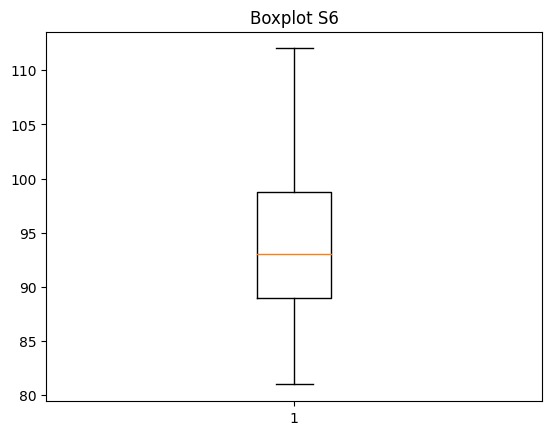

In [168]:
#generamos una grafica box plot y validamos el borrado de los valores atipicos para la variable S6
plt.boxplot(copydata['S6'])
plt.title('Boxplot S6')
plt.show()

### **Boxplot:**
Generamos de nuevo la visualizacion para validar el resultado de la eliminacion de valores a tipicos y vemos que ya quedaron todos borrados y el Data set listo con valores a tipicos.

### **Analisis grafico de los datos:**

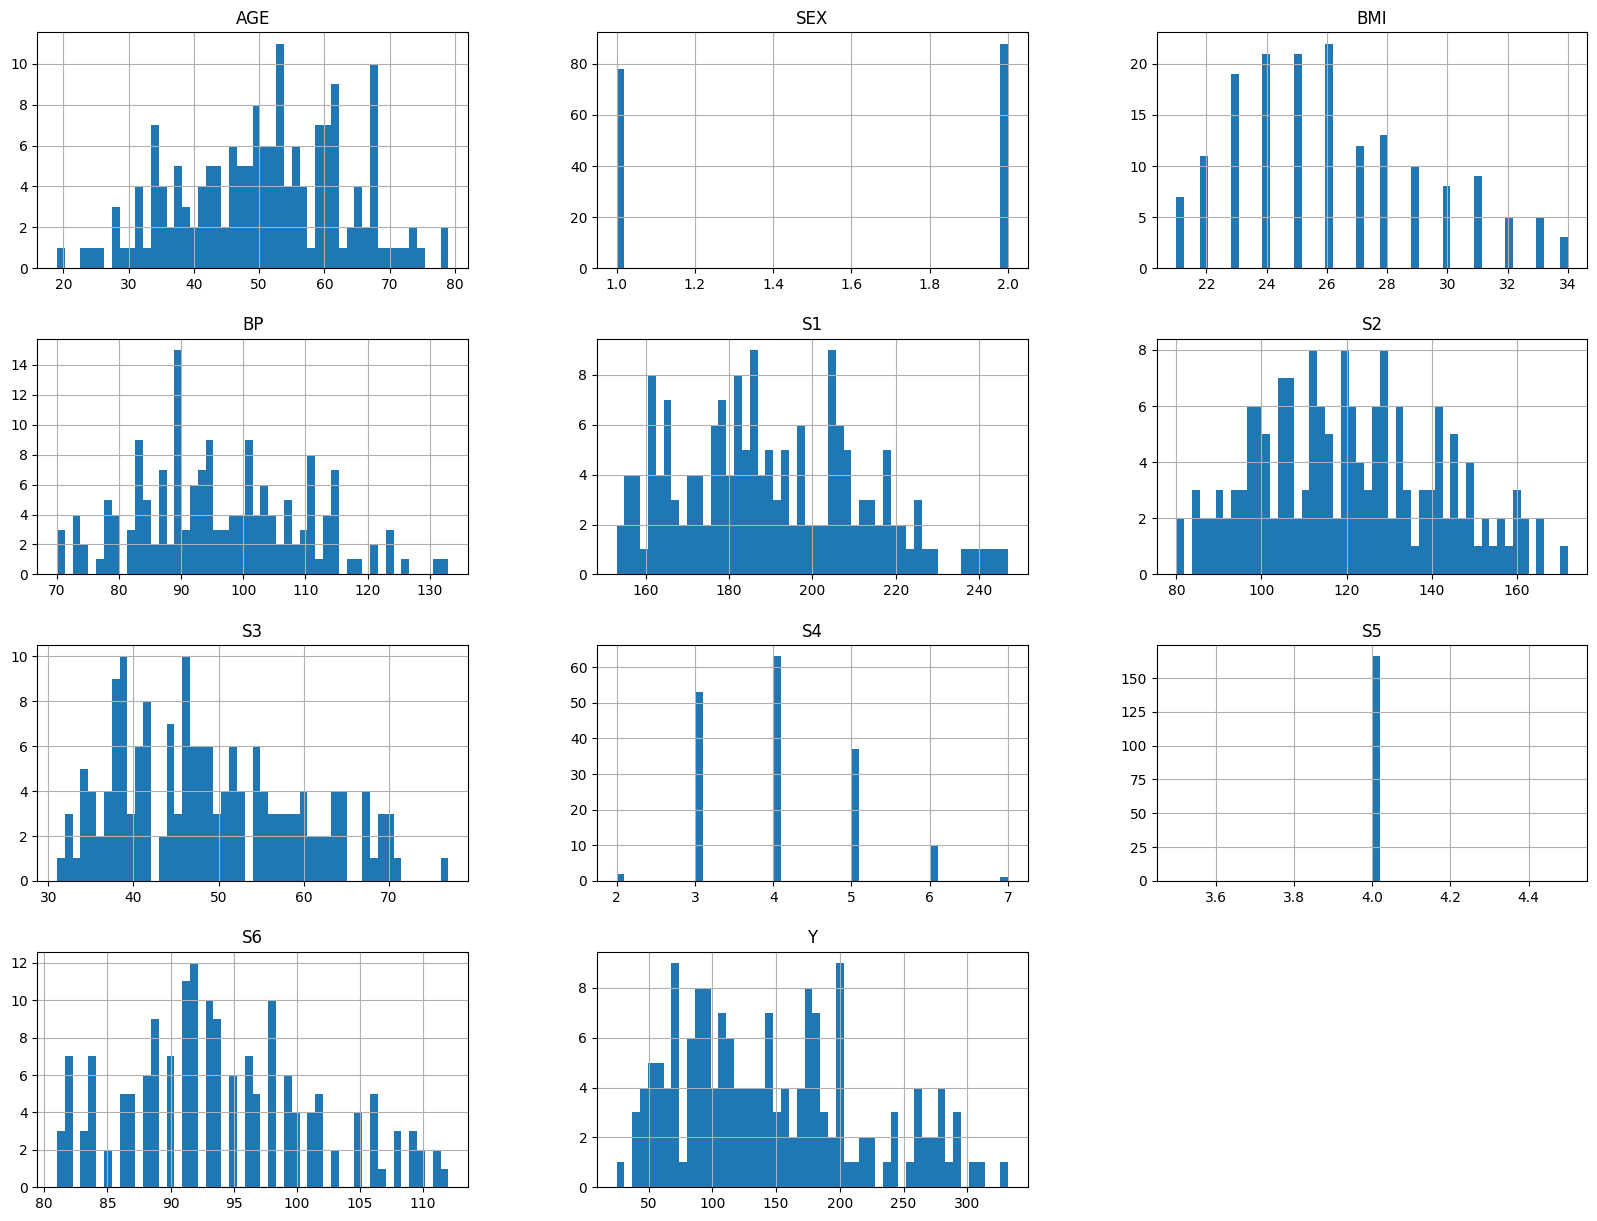

In [179]:
# generamos un histograma por cada columna para realizar una lectura del comportamiento de todos los datos
# y evidenciar las posibles agupaciones de los datos
data.hist(bins=50, figsize=(20,15))
plt.show()

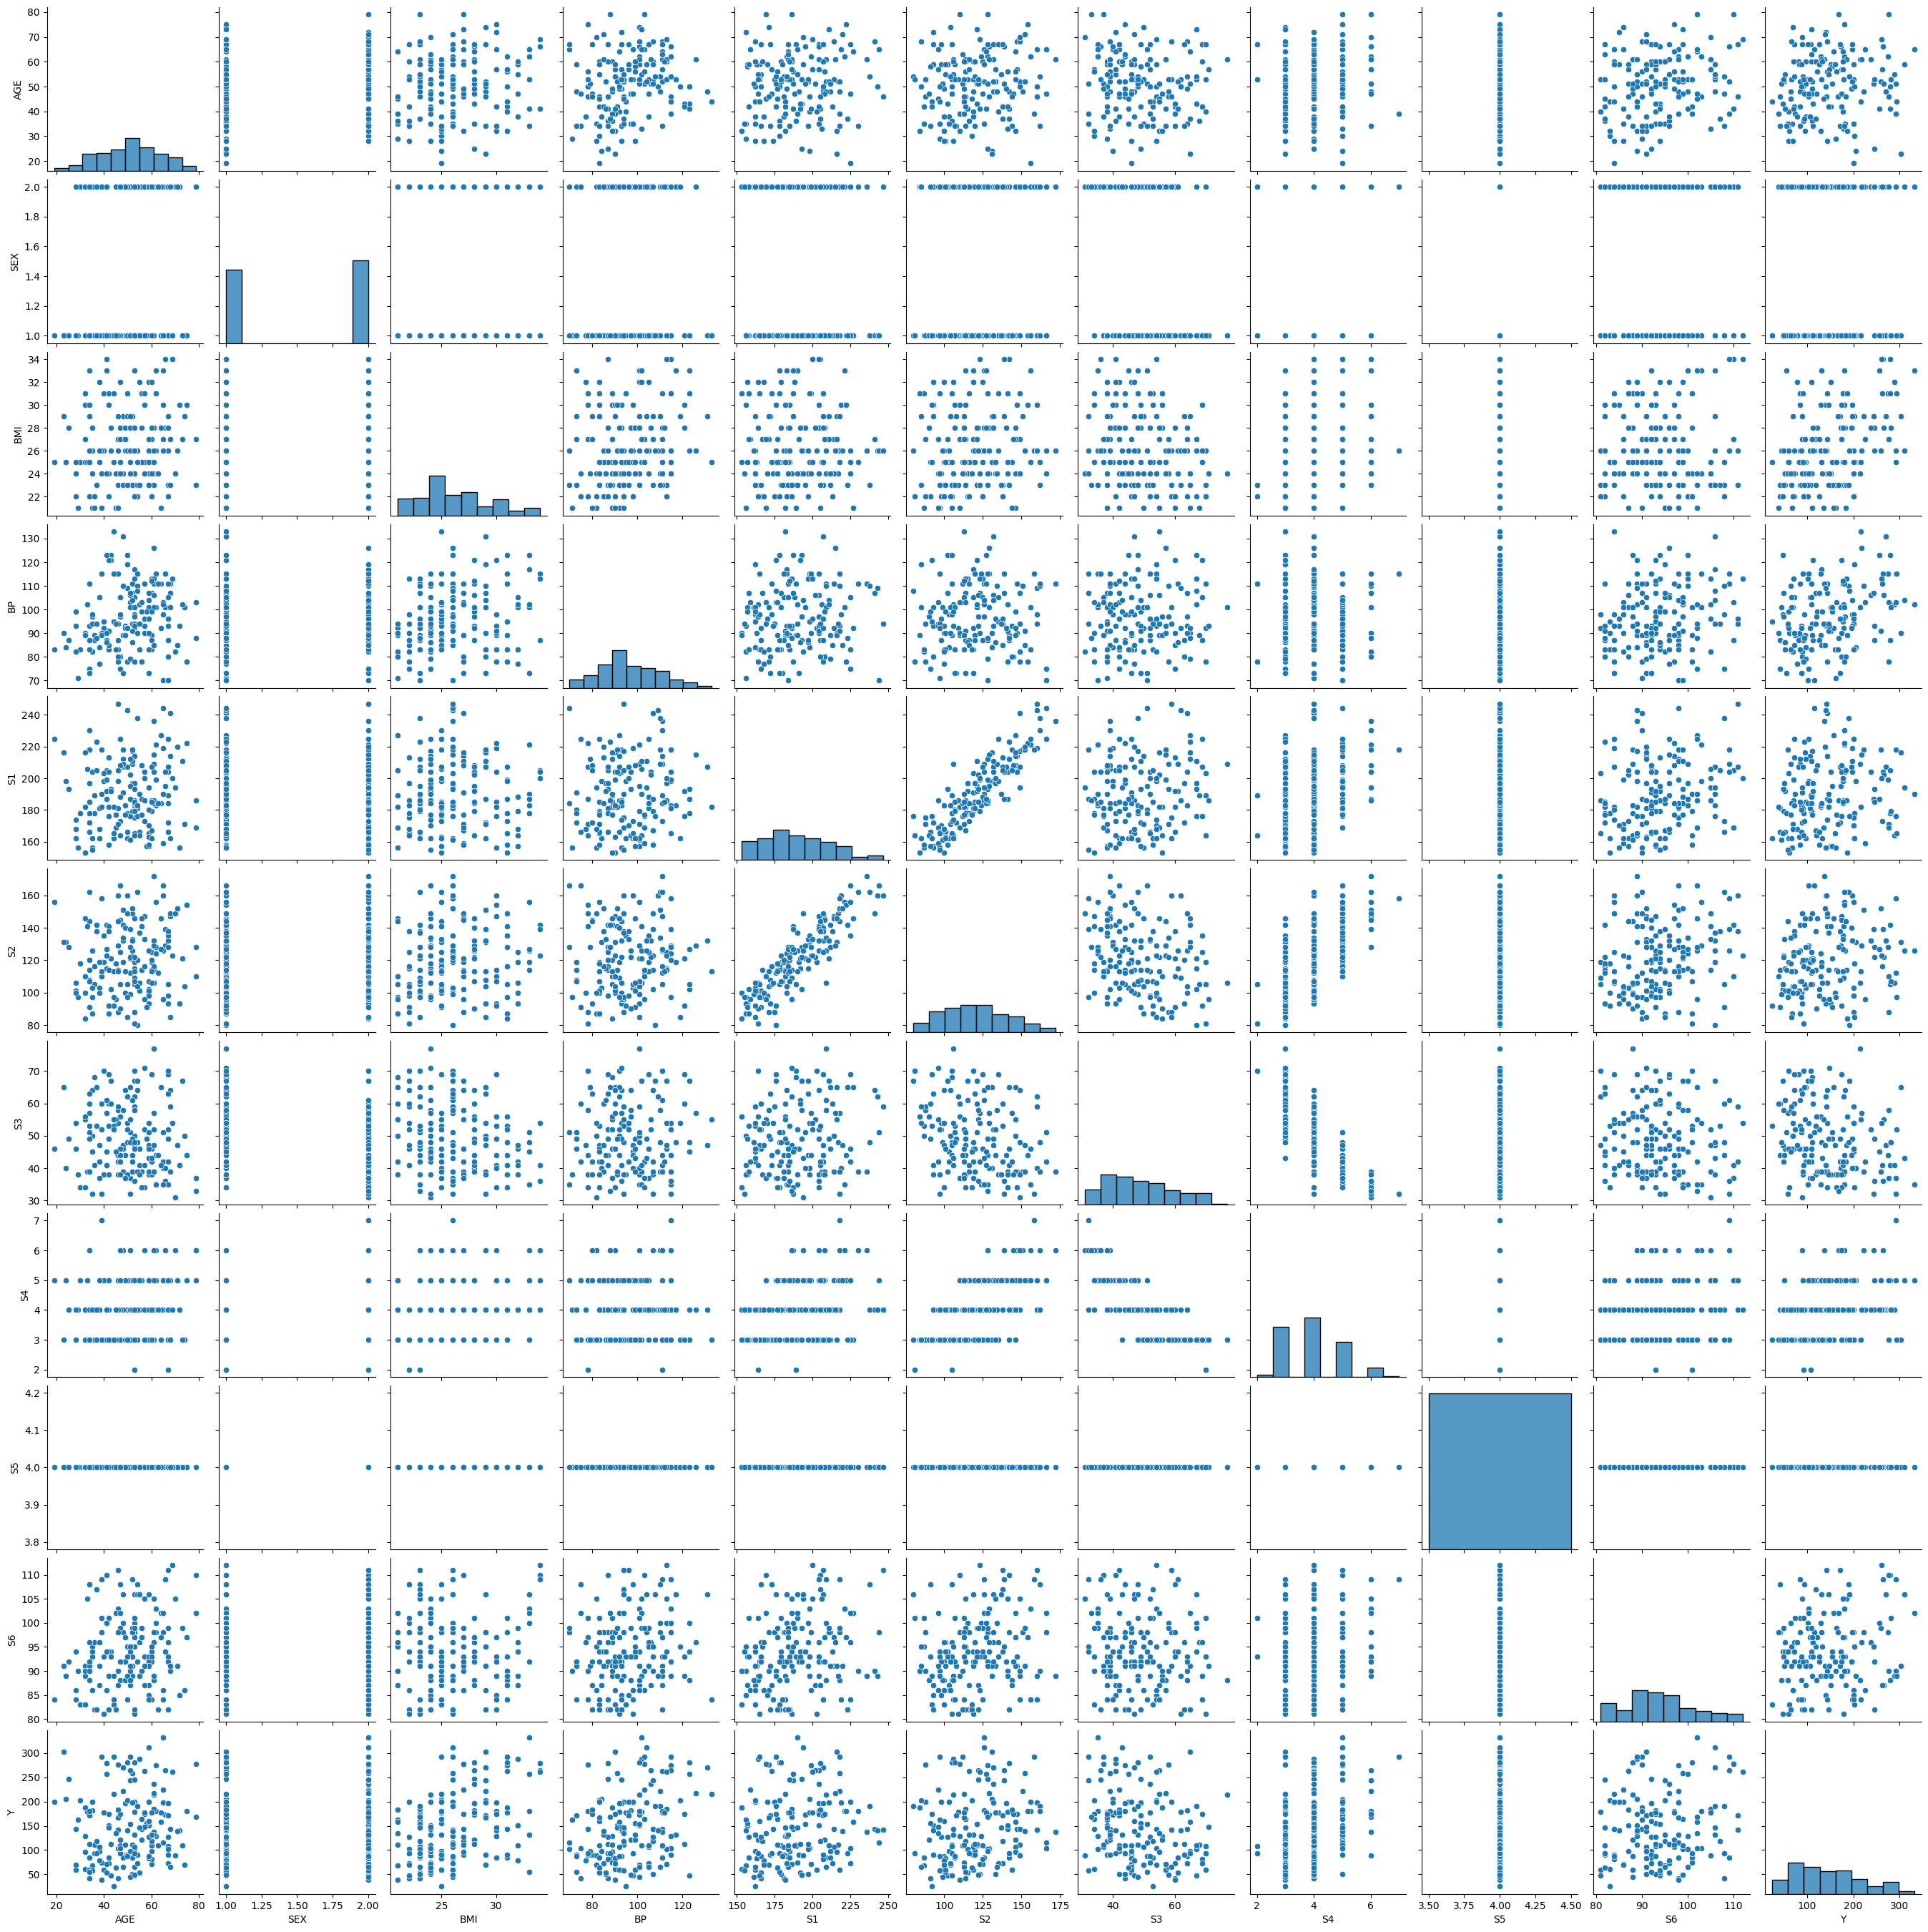

In [180]:
# realizamos un scatter plot para estudiar los valores de los datos
# estos graficos nos ayuda estudiar el comportamiento de de los datos de cada una de las columnas
# con sus relaciones y posibles agrupaciones, relaciones o patrones entre todos los datos
sns.pairplot(data)
plt.show();

In [129]:
# validamos los sub nivels, este tambien nos ayuda a validar el nuemro de datos seleccionables que tiene cada columna
cols_cat = ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
for col in cols_cat:
    print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna AGE: 58 subniveles
Columna SEX: 2 subniveles
Columna BMI: 24 subniveles
Columna BP: 63 subniveles
Columna S1: 141 subniveles
Columna S2: 128 subniveles
Columna S3: 62 subniveles
Columna S4: 8 subniveles
Columna S5: 4 subniveles
Columna S6: 56 subniveles


### ***Correlacion de Datos:***

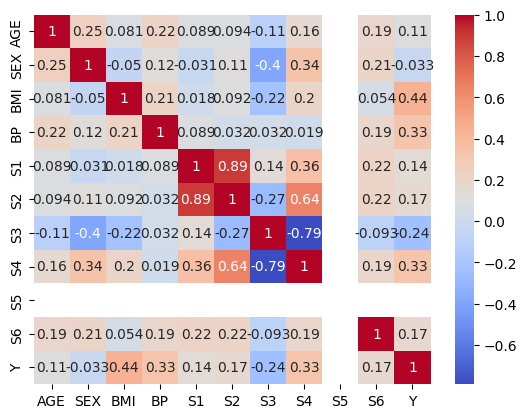

In [176]:
# realizamos la correlacion para identificar los datos que estan corelacionados
data.corr()
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

### **Calculo de las medidas estadísticas:**

In [177]:
# calculamos la media y la varianza la desviacion estandar de todo el data set
print(f'Media: {data.mean()}')
print(f'Varianza: {data.var()}')
print(f'Desviacion Estandar: {data.std()}')


Media: AGE     50.596386
SEX      1.530120
BMI     26.210843
BP      96.325301
S1     189.879518
S2     120.590361
S3      48.903614
S4       4.018072
S5       4.000000
S6      94.048193
Y      145.644578
dtype: float64
Varianza: AGE     154.048229
SEX       0.250602
BMI      10.567397
BP      175.614750
S1      472.203578
S2      435.406937
S3      108.960350
S4        0.890581
S5        0.000000
S6       56.215845
Y      5096.751698
dtype: float64
Desviacion Estandar: AGE    12.411617
SEX     0.500602
BMI     3.250753
BP     13.251972
S1     21.730246
S2     20.866407
S3     10.438407
S4      0.943706
S5      0.000000
S6      7.497723
Y      71.391538
dtype: float64


In [178]:
# calculamos de forma rapida con .decribe, este medodo nos debuelve
# todos los datos estadisticos del data set incluyendo los cuatiles
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.0,166.000000,166.000000
mean,50.596386,1.530120,26.210843,96.325301,189.879518,120.590361,48.903614,4.018072,4.0,94.048193,145.644578
std,12.411617,0.500602,3.250753,13.251972,21.730246,20.866407,10.438407,0.943706,0.0,7.497723,71.391538
min,19.000000,1.000000,21.000000,70.000000,153.000000,80.000000,31.000000,2.000000,4.0,81.000000,25.000000
25%,42.000000,1.000000,24.000000,87.000000,173.000000,105.000000,40.250000,3.000000,4.0,89.000000,89.250000
50%,51.500000,2.000000,26.000000,94.000000,186.000000,119.000000,47.000000,4.000000,4.0,93.000000,136.500000
75%,60.000000,2.000000,28.000000,105.750000,205.750000,135.000000,56.000000,5.000000,4.0,98.750000,189.250000
max,79.000000,2.000000,34.000000,133.000000,247.000000,172.000000,77.000000,7.000000,4.0,112.000000,332.000000


In [183]:
# calculamos el rango,  varianza poblacional y varianza muestral de todo el data set
print(f'Rango: {data.max() - data.min()}')
print(f'Varianza poblacional: {data.var()}')
print(f'Varianza muestral: {data.var(ddof=1)}')


Rango: AGE     60
SEX      1
BMI     13
BP      63
S1      94
S2      92
S3      46
S4       5
S5       0
S6      31
Y      307
dtype: int64
Varianza poblacional: AGE     154.048229
SEX       0.250602
BMI      10.567397
BP      175.614750
S1      472.203578
S2      435.406937
S3      108.960350
S4        0.890581
S5        0.000000
S6       56.215845
Y      5096.751698
dtype: float64
Varianza muestral: AGE     154.048229
SEX       0.250602
BMI      10.567397
BP      175.614750
S1      472.203578
S2      435.406937
S3      108.960350
S4        0.890581
S5        0.000000
S6       56.215845
Y      5096.751698
dtype: float64


Asimetria: 0.598148487911046
Kurtosis: 0.0950944742751707


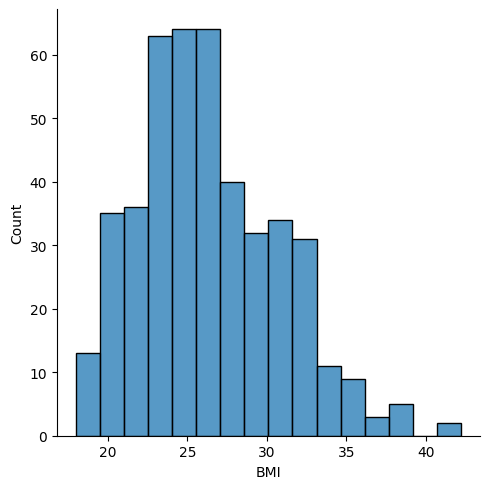

In [209]:
# Calculamos Asimetría y Kurtosis d ela variable BMI
sns.displot(data['BMI'])
print(f'Asimetria: {data["BMI"].skew()}')
print(f'Kurtosis: {data["BMI"].kurt()}')


### **Exportamos datos resultantes:**

In [153]:
# exportamos los datos aun archivo de Excel llmado diabetes.xlsx en la raiz de la ejecución
data.to_excel('diabetes.xlsx')
print('Se exporto el archivo diabetes.xlsx')

Se exporto el archivo diabetes.xlsx
